# Projekt KNDS

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Import bibliotek**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import funkcji**

In [23]:
import dataAnalysis as dataAnalysis
import dataProcessing as dataProcessing
import regressionModel as regressionModel
import logisticRegressionModel as logisticRegressionModel
import decisionTreeModel as decisionTreeModel
import randomForest as randomForest
import adaBoost as adaBoost
import modelDescription as modelDescription

**Import danych**

In [24]:
def getData(filePath):
    dataset = pd.read_csv(filePath)
    return dataset

def printData(data, rows):
    print(data.head(rows))


dataFilePath = '../Resources/Hotel_Reservations.csv'
data = getData(dataFilePath)

**Analiza zbioru**

  1. Analiza podstawowa

In [25]:
dataAnalysis.analyzeData(data)

Analyzing data...
Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-n

  2. Rozkłady zmiennych numerycznych

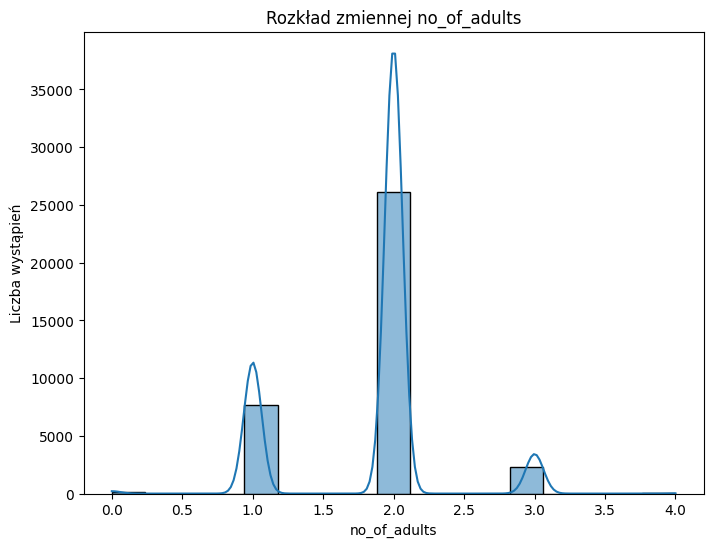

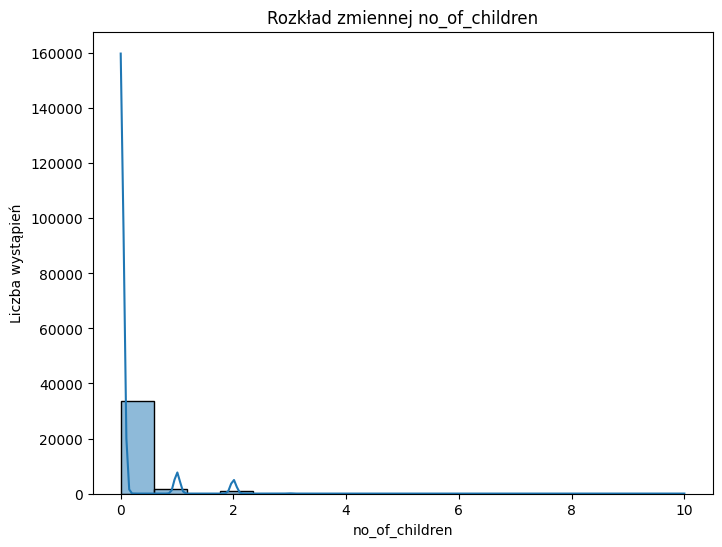

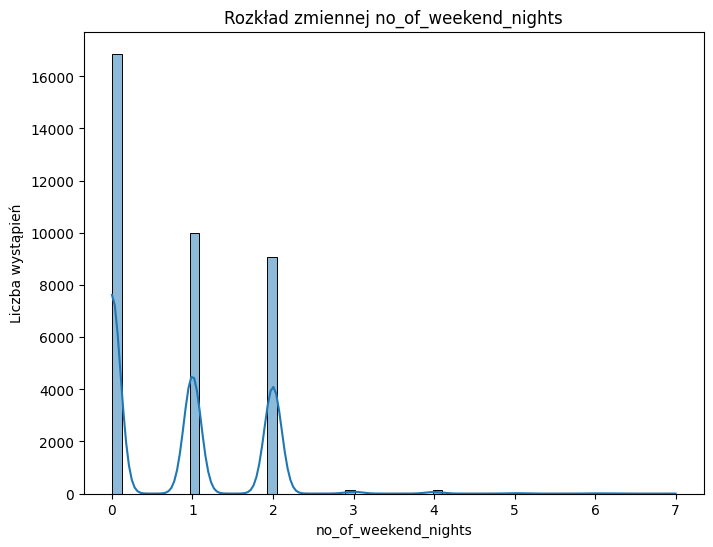

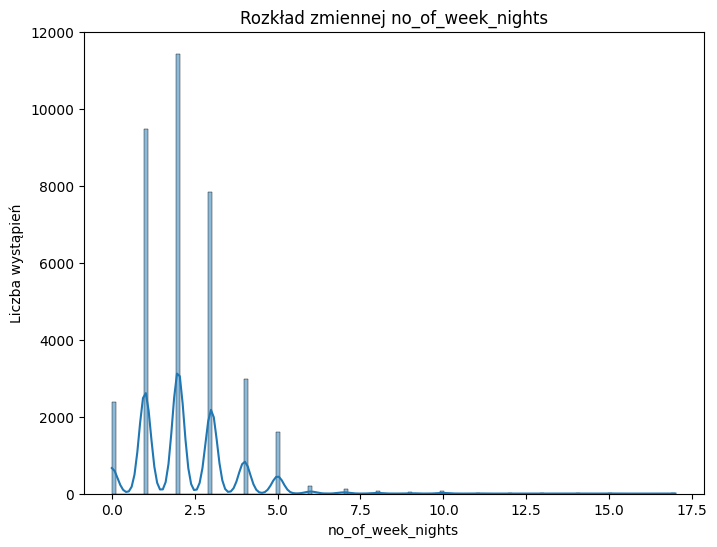

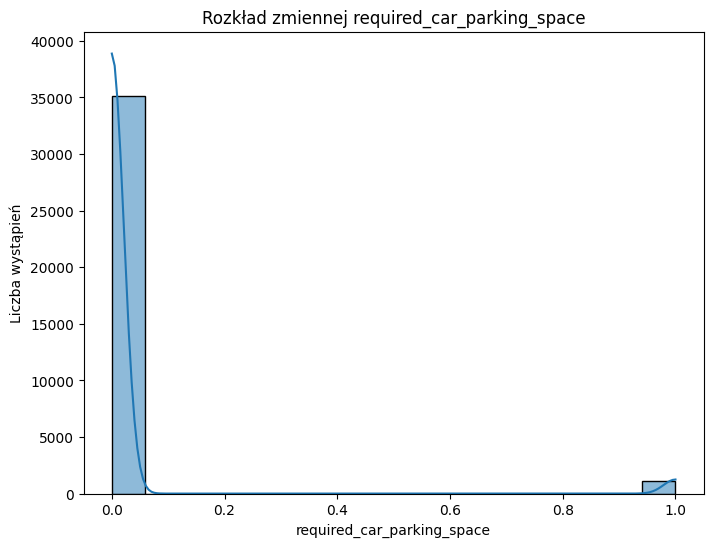

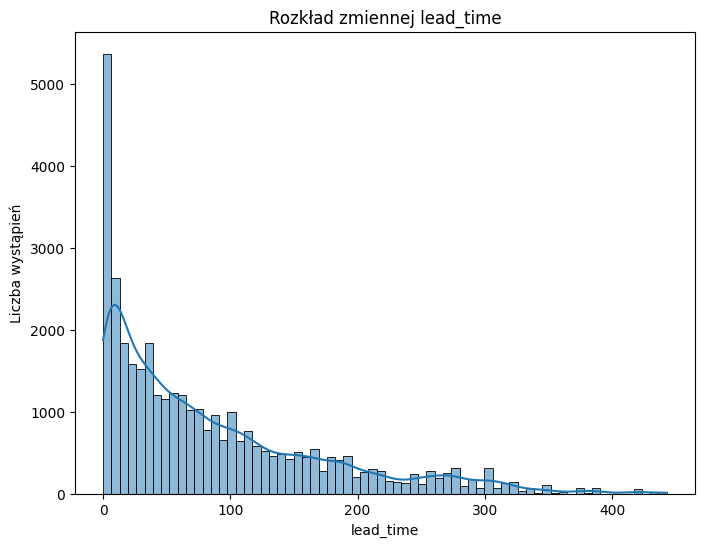

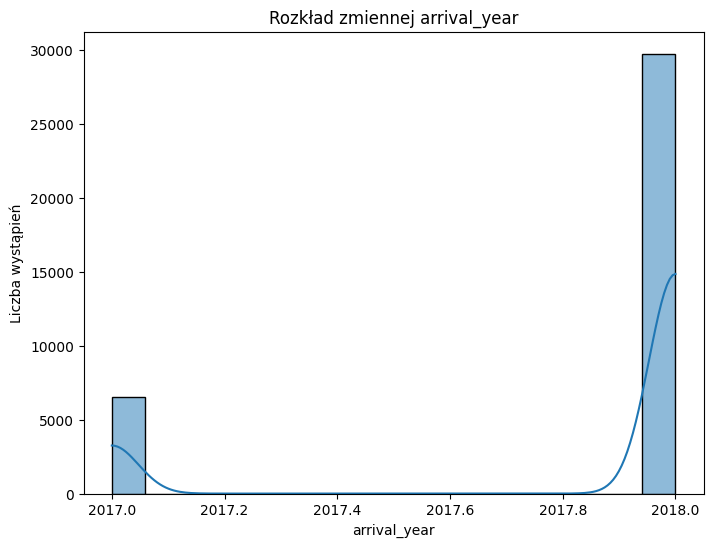

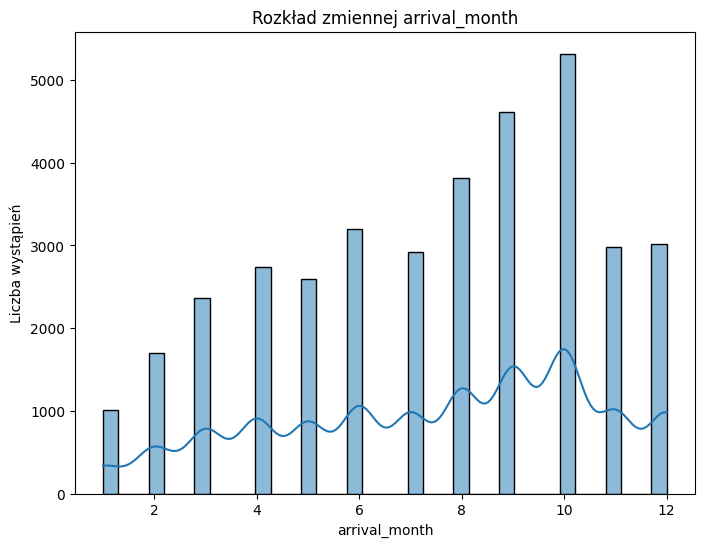

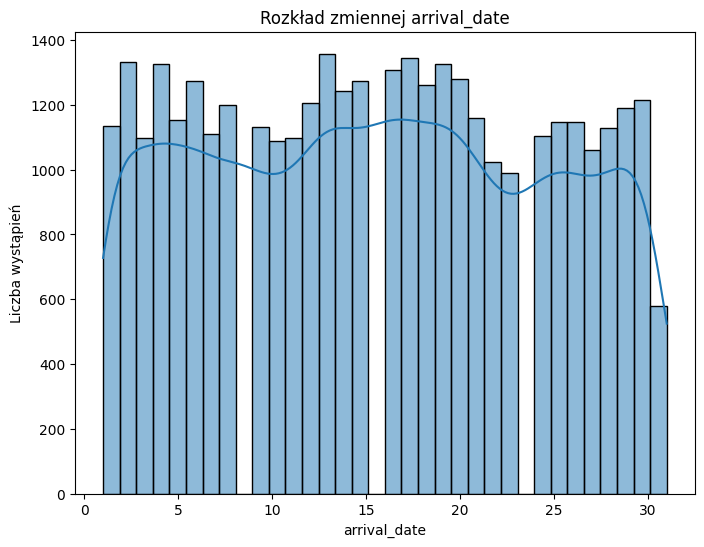

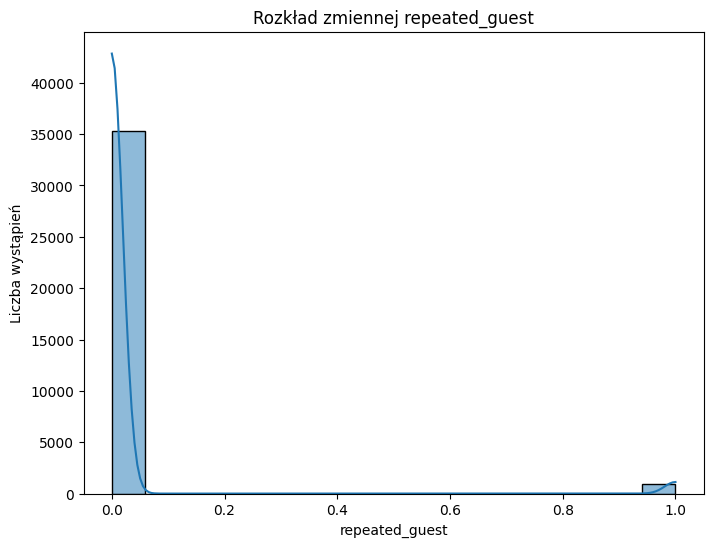

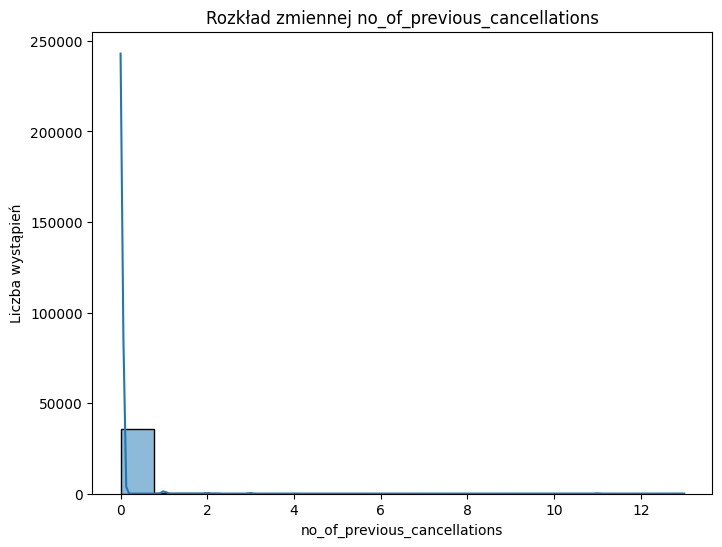

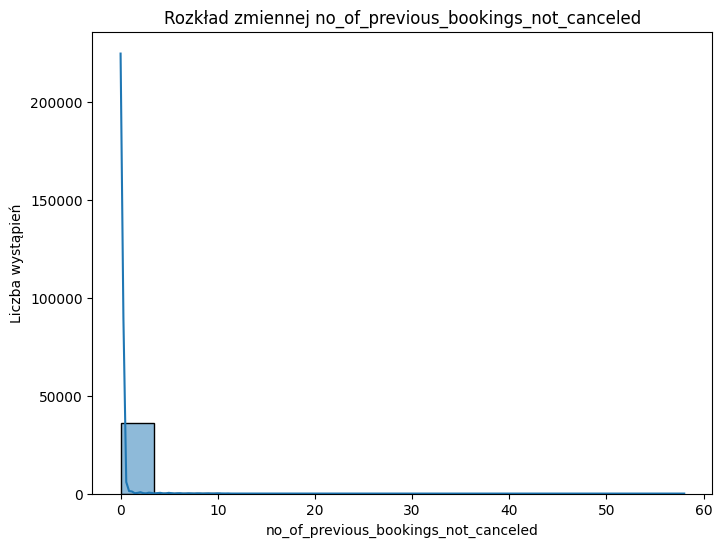

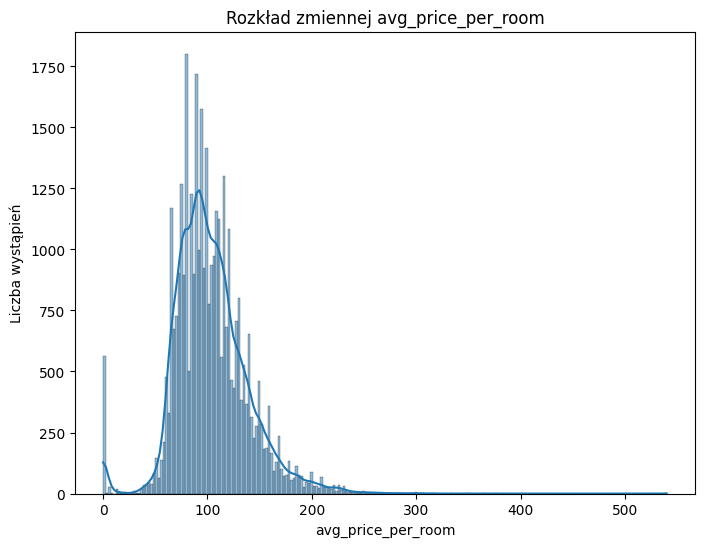

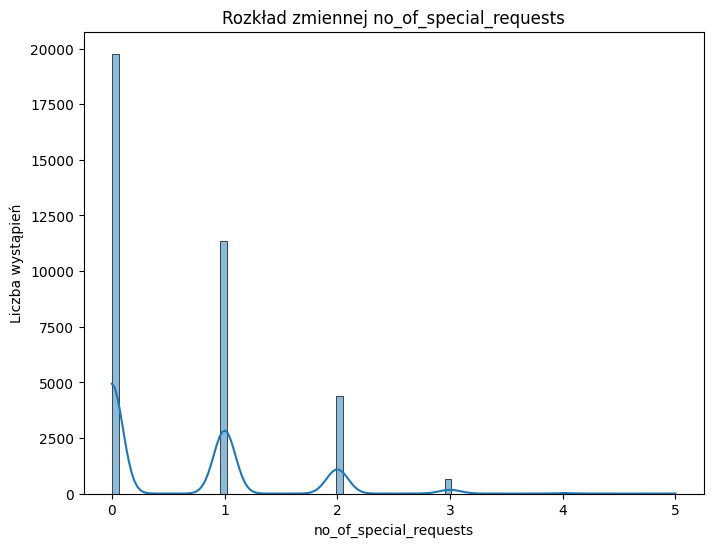

In [26]:
dataAnalysis.plotHist(data)

3. Rozkłady zmiennych kategorycznych

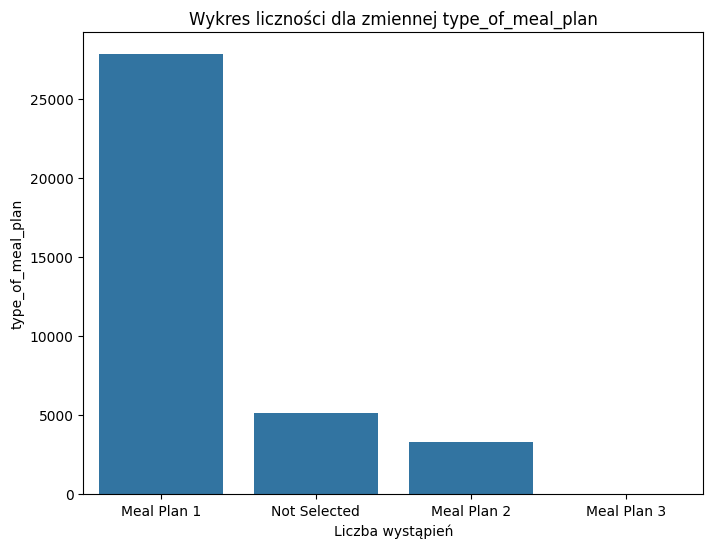

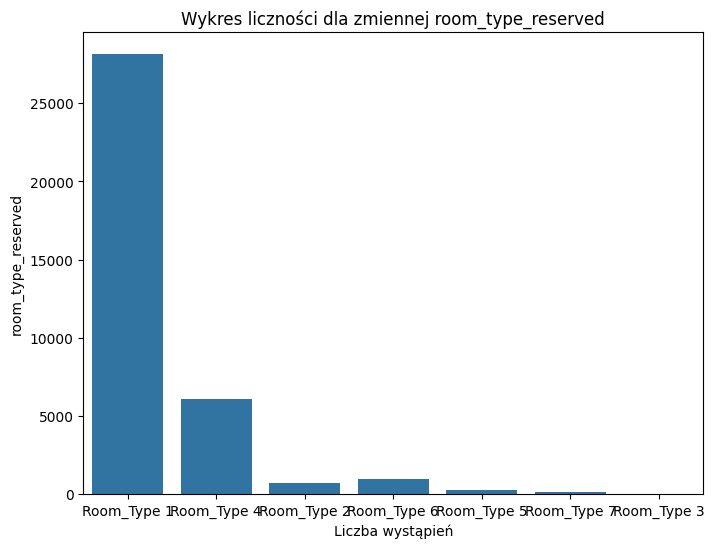

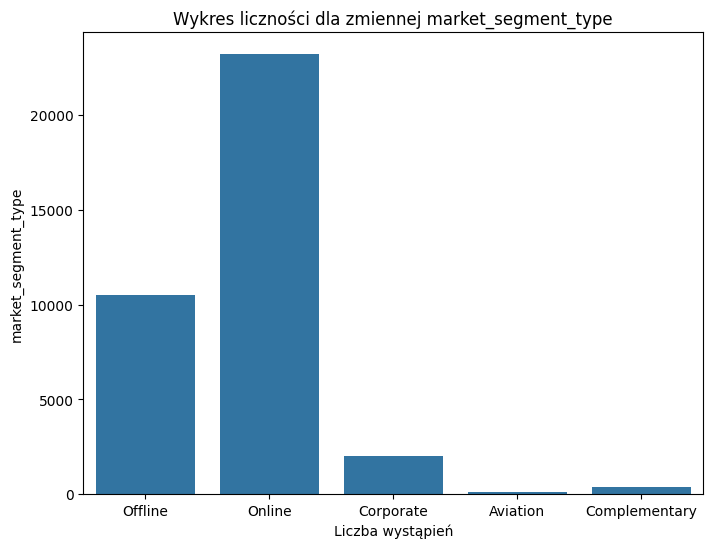

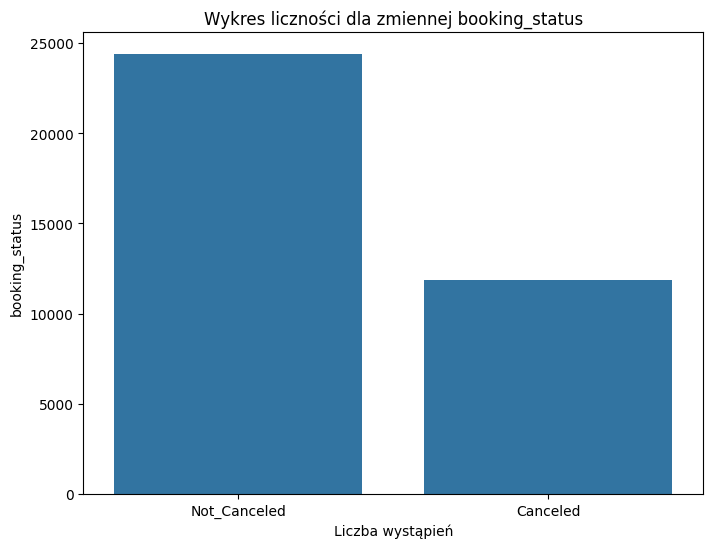

In [27]:
dataAnalysis.plotCounts(data)

  4. Analiza wartości odstających

In [28]:
dataAnalysis.startIQRAnalysis(data)

Number of outliers in no_of_adults:
 10167
Number of outliers in no_of_children:
 2698
Number of outliers in no_of_weekend_nights:
 21
Number of outliers in no_of_week_nights:
 324
Number of outliers in required_car_parking_space:
 1124
Number of outliers in lead_time:
 1331
Number of outliers in arrival_year:
 6514
Number of outliers in arrival_month:
 0
Number of outliers in arrival_date:
 0
Number of outliers in repeated_guest:
 930
Number of outliers in no_of_previous_cancellations:
 338
Number of outliers in no_of_previous_bookings_not_canceled:
 812
Number of outliers in avg_price_per_room:
 1696
Number of outliers in no_of_special_requests:
 761


  5. Wartości odstające - wykresy

  6. Współczynnik korealcji Pearsona

In [29]:
dataAnalysis.correlationCoefficient(data)

['no_of_adults', 'no_of_children', np.float64(-0.01978707355793209)]
['no_of_adults', 'no_of_weekend_nights', np.float64(0.10331577522391473)]
['no_of_adults', 'no_of_week_nights', np.float64(0.10562190100313681)]
['no_of_adults', 'required_car_parking_space', np.float64(0.011428744691347945)]
['no_of_adults', 'lead_time', np.float64(0.09728651035955285)]
['no_of_adults', 'arrival_year', np.float64(0.07671928950617037)]
['no_of_adults', 'arrival_month', np.float64(0.021841470547424004)]
['no_of_adults', 'arrival_date', np.float64(0.026337868434581937)]
['no_of_adults', 'repeated_guest', np.float64(-0.19227693931856774)]
['no_of_adults', 'no_of_previous_cancellations', np.float64(-0.04742574729059412)]
['no_of_adults', 'no_of_previous_bookings_not_canceled', np.float64(-0.11916579302273704)]
['no_of_adults', 'avg_price_per_room', np.float64(0.2968857360658217)]
['no_of_adults', 'no_of_special_requests', np.float64(0.1894009513721449)]
['no_of_children', 'no_of_weekend_nights', np.float6

  7. Korelacja zmiennych - wykresy

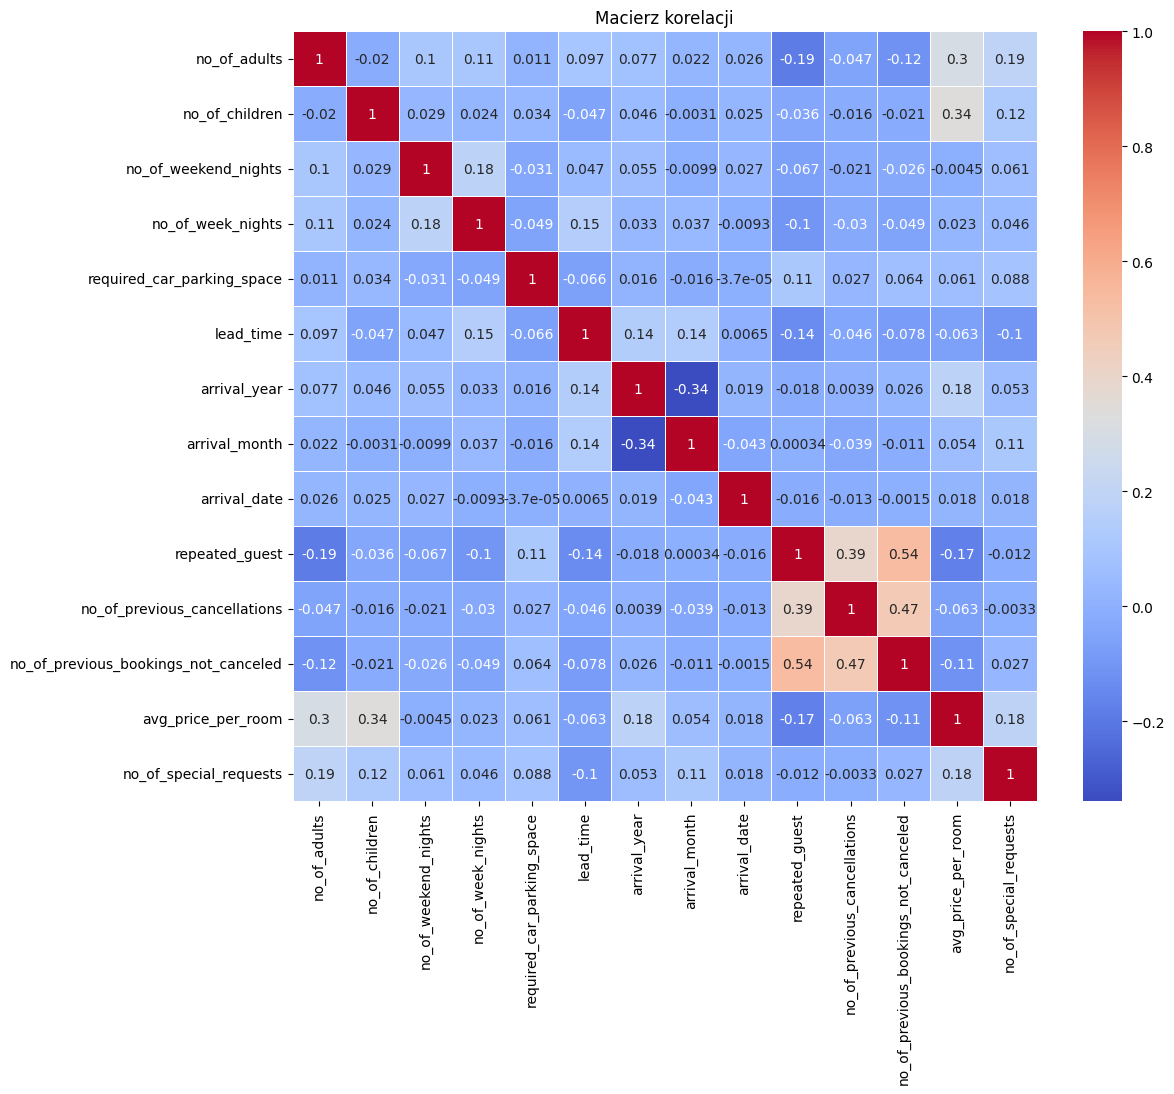

In [30]:
# Do pokazania korealacji miezy zmiennymi najlepsza jest heatmap, bo pokazuje korelacje między wszystkimi zmiennymi jednocześnie.

dataAnalysis.plotHeatmap(data)

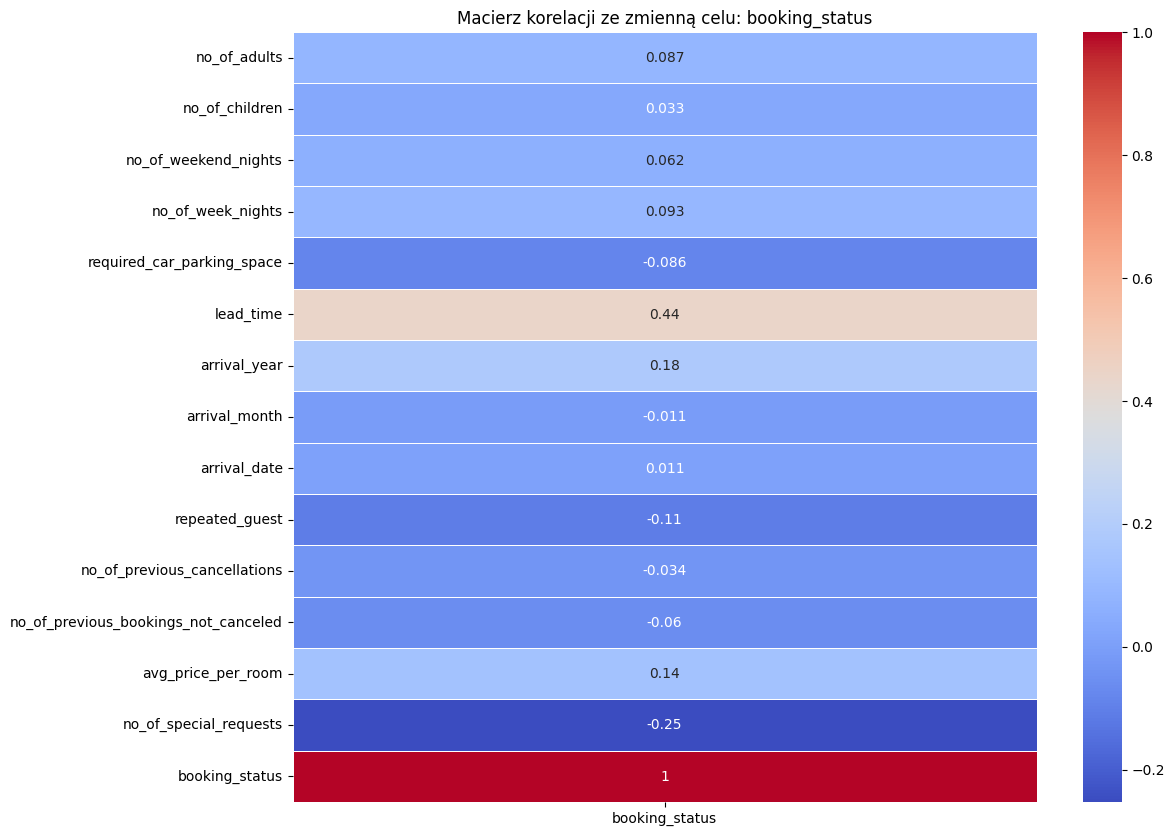

In [31]:
dataAnalysis.plotCorrelationWithTarget(data)

  8. Zależności między kolumnami numerycznymi a zmienną celu

Target variable for box plots: booking_status


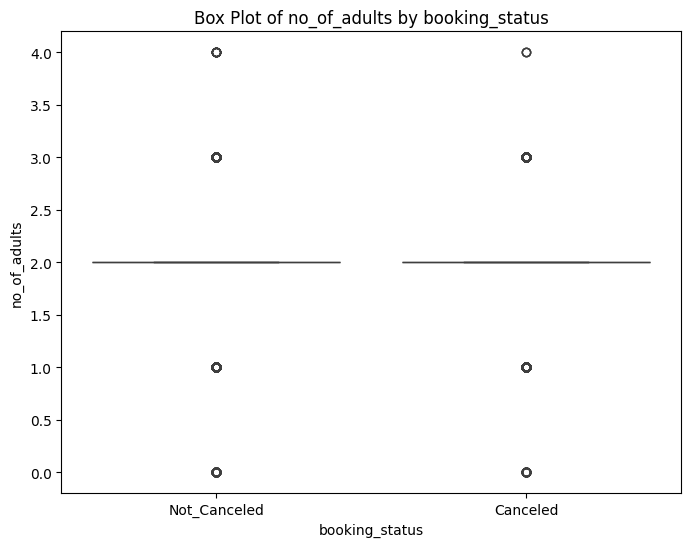

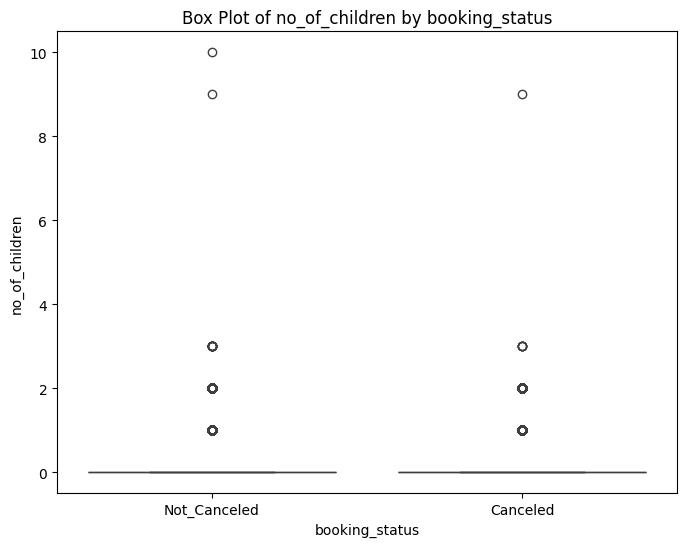

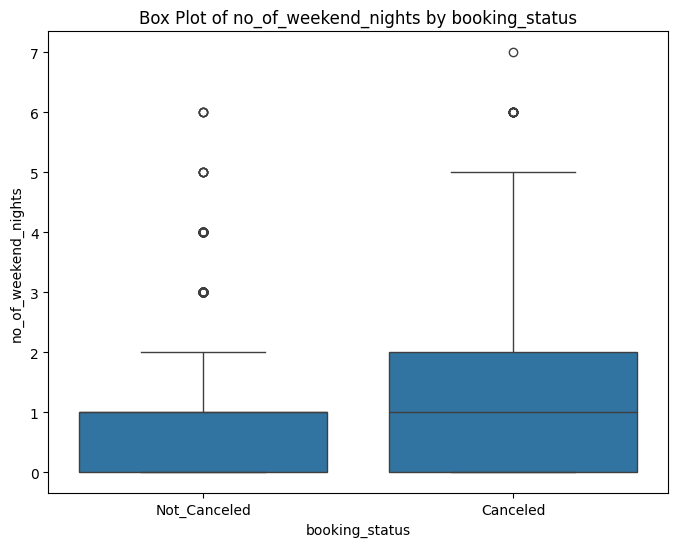

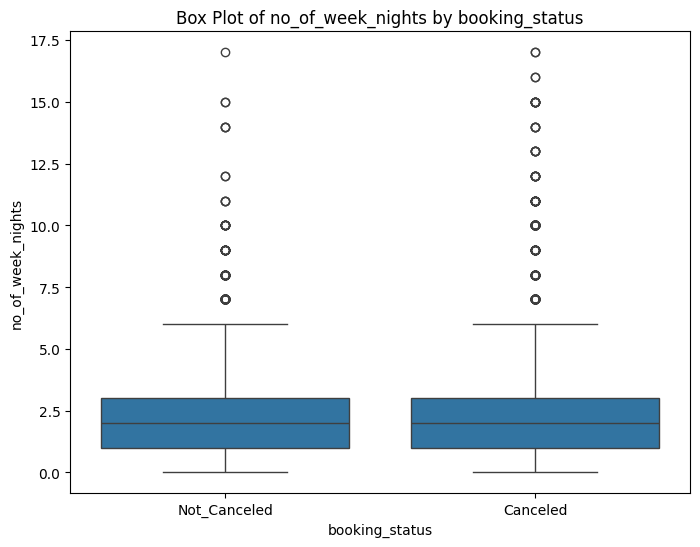

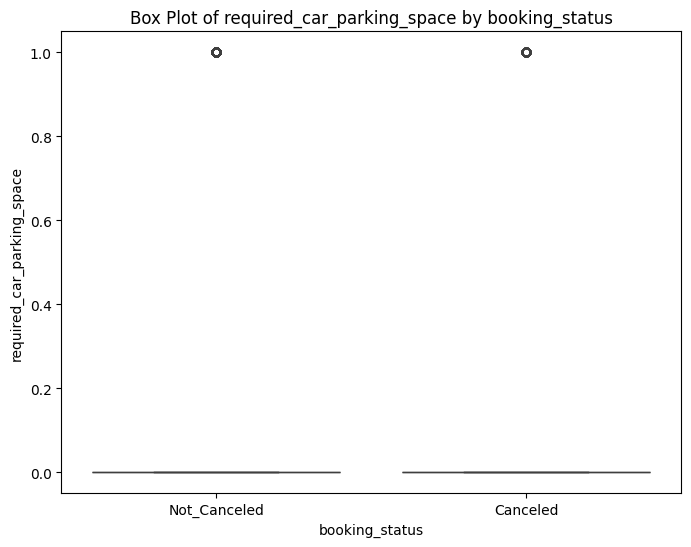

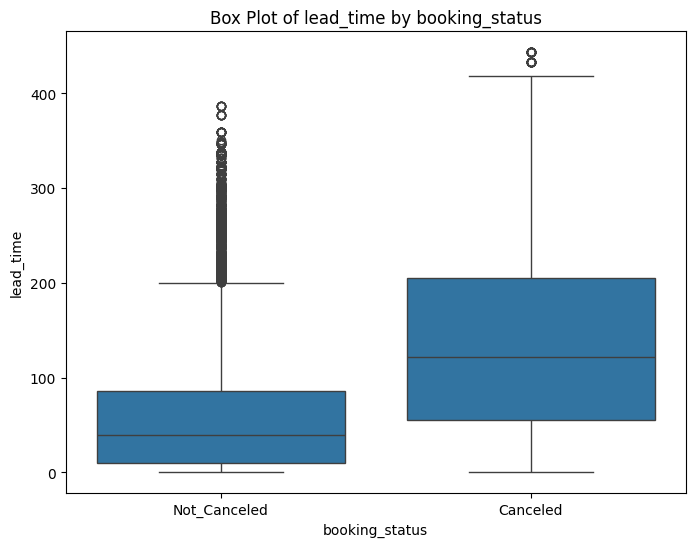

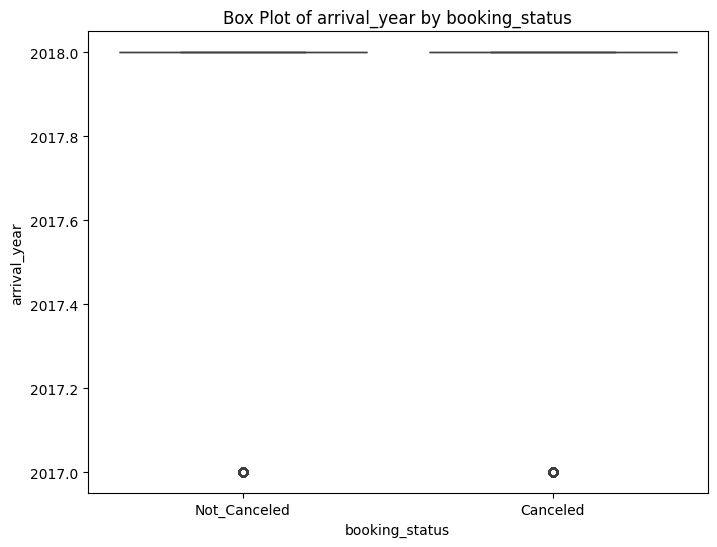

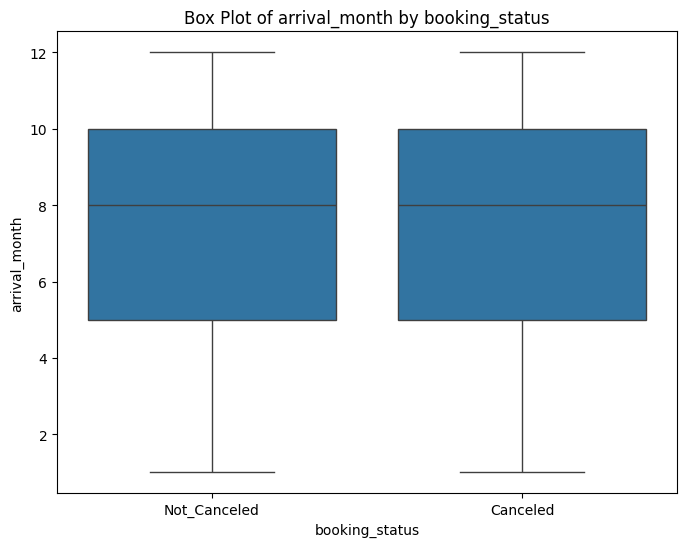

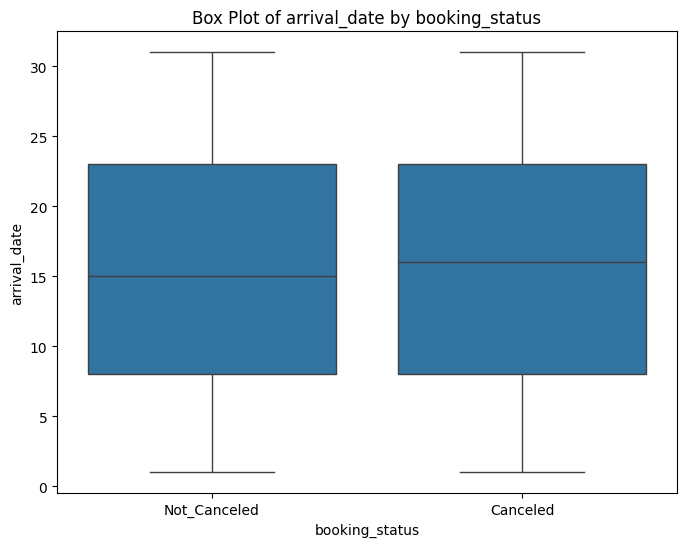

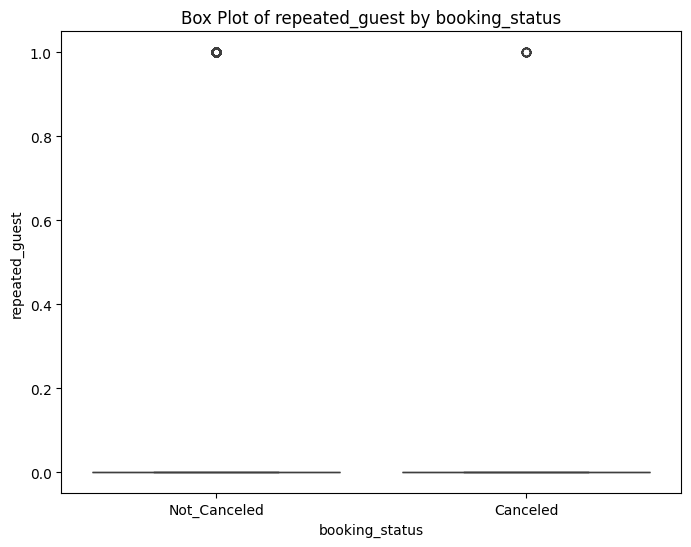

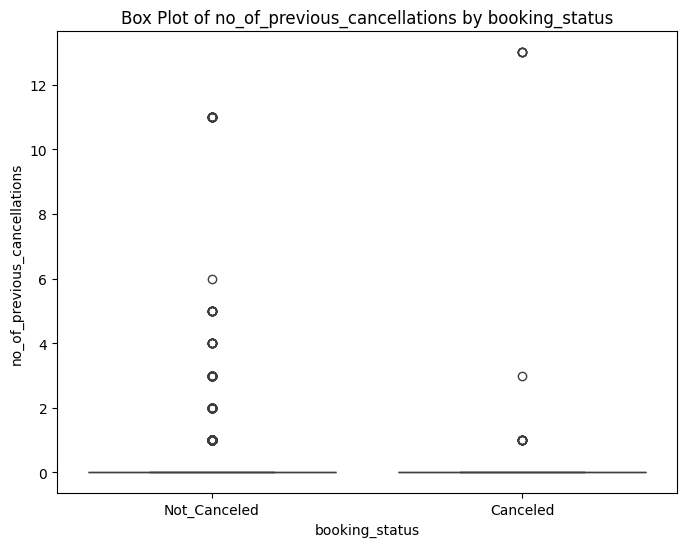

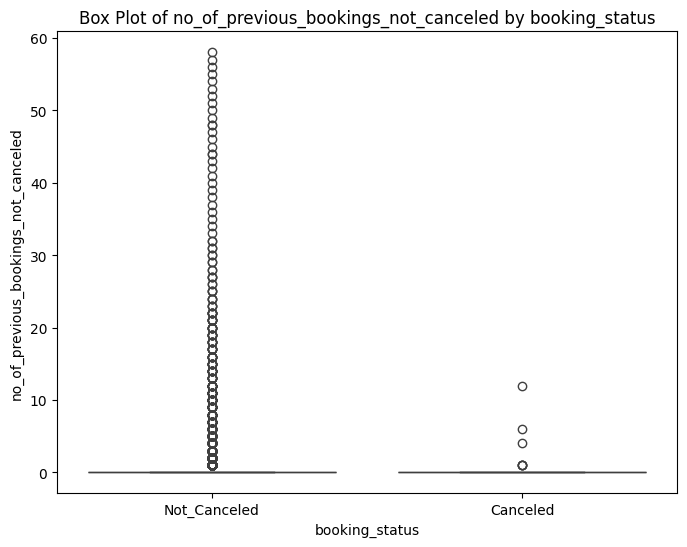

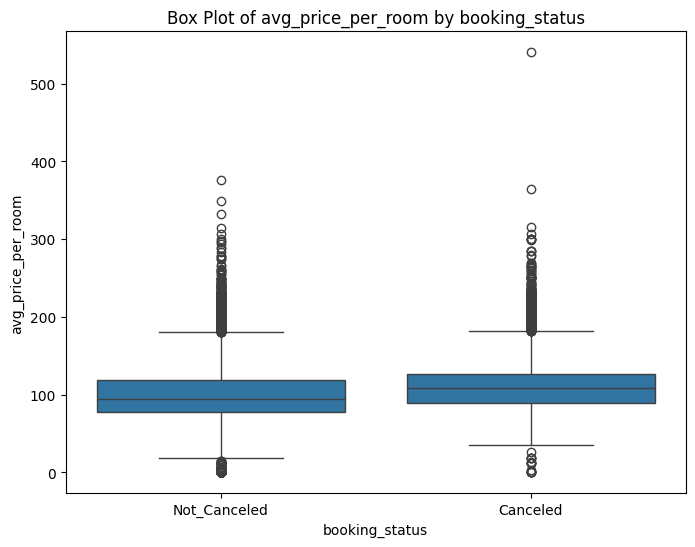

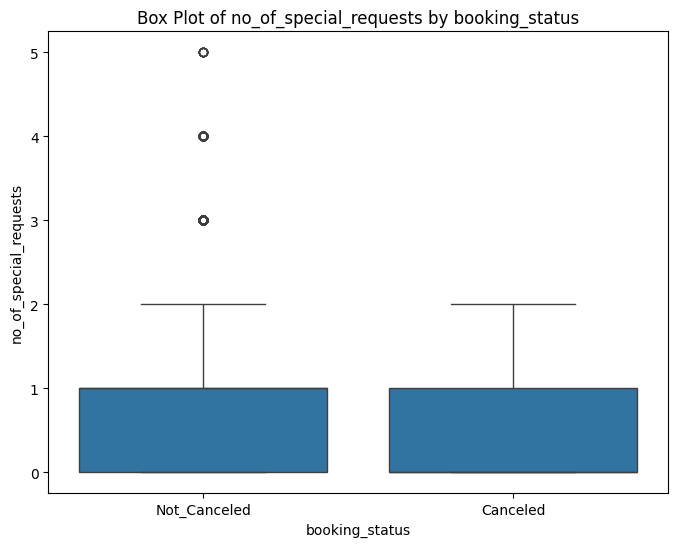

In [11]:
dataAnalysis.plotBoxDiagramsForTargetVar(data)

**Przetworzenie danych i przygotowanie zbiorów**

In [12]:
# Trzeba dropnąć Booking_ID i arrival bo wywali 30k kolumn

data = data.drop(columns=['Booking_ID'])

X_train_processed, X_test_processed, y_train_processed, y_test_processed = dataProcessing.processData(data)


Processing data...
Splitting data...
All feratures:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Numerical features:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical features:  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
Processed training dataset: 
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.302374        2.242799             -

**Trening - Regresja logistyczna i Drzewo decyzyjne**

1. Regresja logistyczna

Training Logistic Regression model...
Dataset 1 (Diagonal) - Logistic Regression Accuracy: 0.8062
Coefficients of the Logistic Regression model: [[ 0.03607455  0.06141983  0.12405649  0.05497398 -0.27946683  1.34397646
   0.17218532 -0.11548617  0.01778253 -0.36060723  0.08320715 -0.12663724
   0.6473168  -1.16257475 -0.51167181 -0.32913362  0.23163005 -0.27810532
   0.48366209  0.00174444  0.08877327  0.22802164 -0.28246552 -0.49046055
  -0.91655606  0.79467784 -1.63036448 -0.01169741 -0.91000196  0.87010531]]
Intercept of the Logistic Regression model: [-1.37463937]
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4955
           1       0.72      0.64      0.68      2300

    accuracy                           0.81      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255



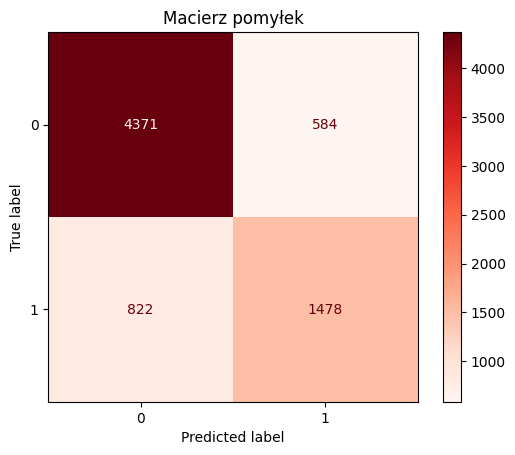

In [13]:
logistic_regression_model = logisticRegressionModel.logisticRegressionTrain(X_train_processed, X_test_processed, y_train_processed, y_test_processed)
modelDescription.modelBenchmark(logistic_regression_model,X_test_processed,y_test_processed)
modelDescription.confusionMatrix(logistic_regression_model,X_test_processed,y_test_processed)

2. Drzwo decyzyjne

Training Decision Tree model...
Dataset 1 (Diagonal) - Decision Tree Accuracy: 0.8772
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4955
           1       0.80      0.82      0.81      2300

    accuracy                           0.88      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.88      0.88      0.88      7255



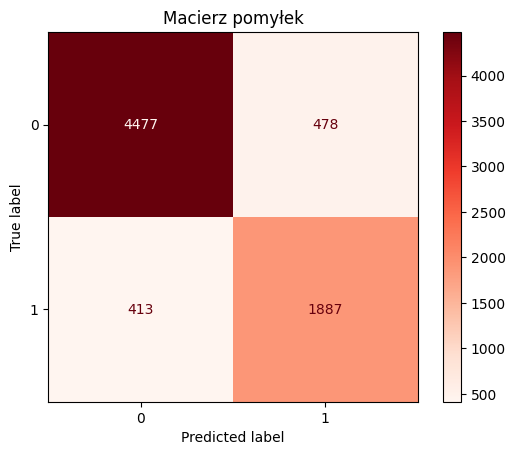

In [14]:
decsion_tree_model = decisionTreeModel.decisionTreeTrain(X_train_processed, X_test_processed, y_train_processed, y_test_processed)
modelDescription.modelBenchmark(decsion_tree_model,X_test_processed,y_test_processed)
modelDescription.confusionMatrix(decsion_tree_model,X_test_processed,y_test_processed)


Random Forest

inicializing RandomForestClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4955
           1       0.87      0.81      0.84      2300

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255



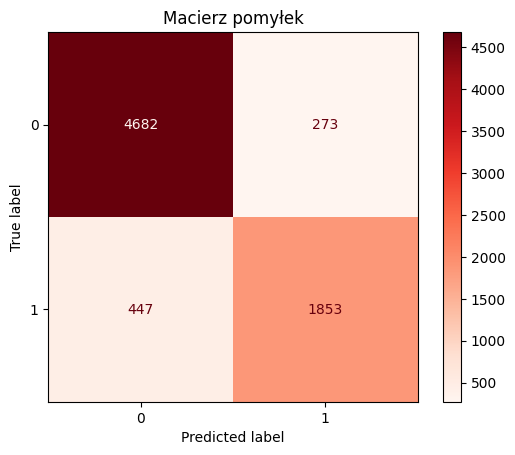

[np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_]
30


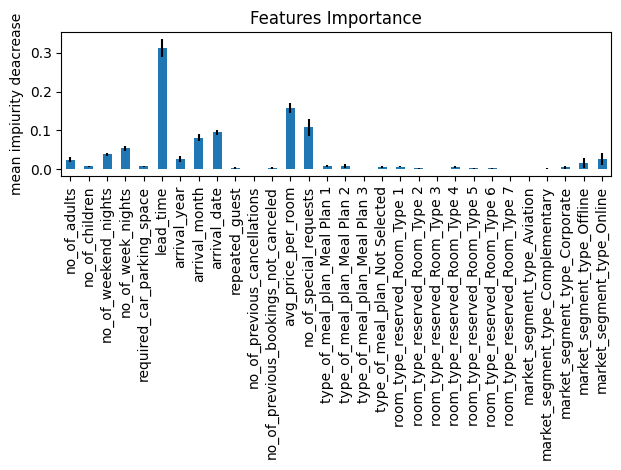

In [15]:
rf = randomForest.randomForestTraining(X_train_processed,y_train_processed)
modelDescription.modelBenchmark(rf,X_test_processed,y_test_processed)
modelDescription.confusionMatrix(rf,X_test_processed,y_test_processed)
cv = modelDescription.FeaturesImportance(rf,X_train_processed)
print(len(cv))

Deleting unstable features, retraining and ploting DecisionBoundry with 2 most important features

In [16]:
X_trained_copy = X_train_processed.loc[:,cv]
y_trained_copy = y_train_processed
X_test_copy = X_test_processed.loc[:,cv]
y_test_copy = y_test_processed
print(len(X_trained_copy.columns))
print(len(X_train_processed.columns))


8
30


inicializing RandomForestClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4955
           1       0.81      0.67      0.73      2300

    accuracy                           0.85      7255
   macro avg       0.83      0.80      0.81      7255
weighted avg       0.84      0.85      0.84      7255



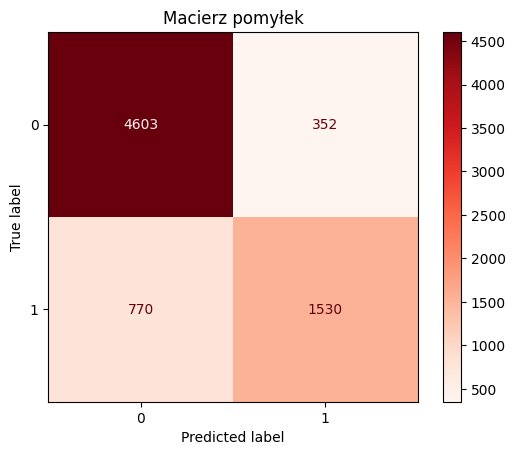

[np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_]


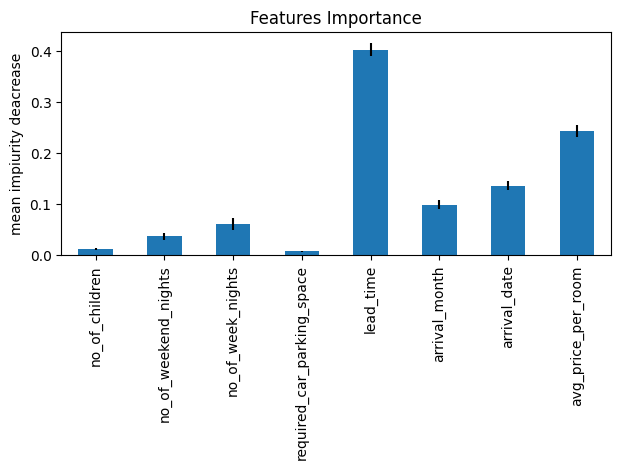

In [17]:
rf = randomForest.randomForestTraining(X_trained_copy,y_trained_copy)
modelDescription.modelBenchmark(rf,X_test_copy,y_test_copy)
modelDescription.confusionMatrix(rf,X_test_copy,y_test_copy)
cv = modelDescription.FeaturesImportance(rf,X_trained_copy)

inicializing RandomForestClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4955
           1       0.71      0.64      0.68      2300

    accuracy                           0.80      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



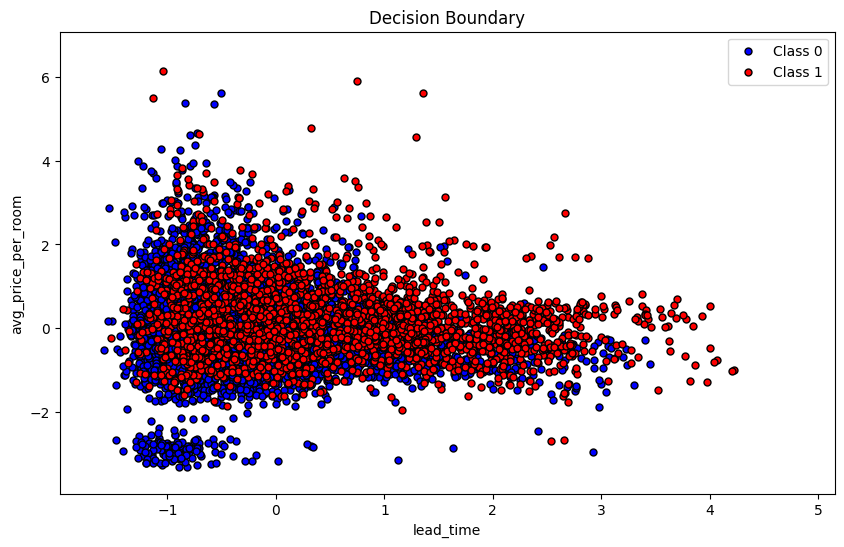

In [18]:
top_features = ["lead_time", "avg_price_per_room"]
X_train_top = X_train_processed[top_features]
X_test_top = X_test_processed[top_features]
rf_top = randomForest.randomForestTraining(X_train_top,y_train_processed)
modelDescription.modelBenchmark(rf_top,X_test_top,y_test_processed)
modelDescription.DecisionBoundryWithJitter(rf_top,X_test_top,y_test_processed,jitter_amount=0.2)

adaBoost

inicializing AdaBoostClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4955
           1       0.72      0.68      0.70      2300

    accuracy                           0.82      7255
   macro avg       0.79      0.78      0.79      7255
weighted avg       0.82      0.82      0.82      7255

[np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.False_]


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


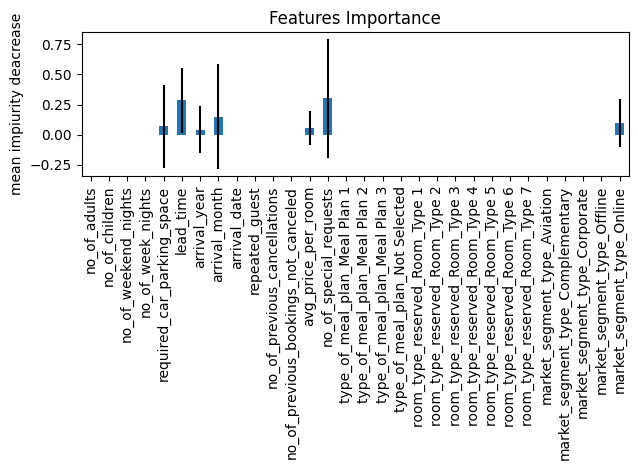

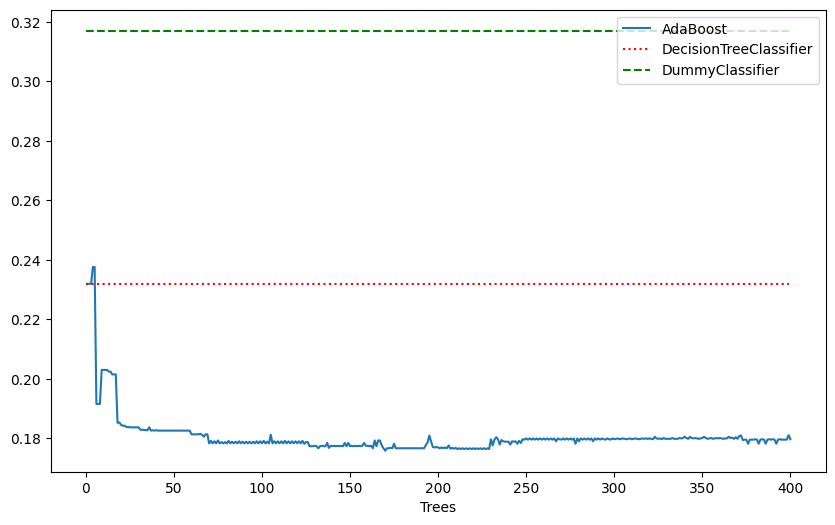

inicializing AdaBoostClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4955
           1       0.72      0.68      0.70      2300

    accuracy                           0.82      7255
   macro avg       0.79      0.78      0.79      7255
weighted avg       0.82      0.82      0.82      7255

7
30


In [19]:
ad = adaBoost.adaBoostTraining(X_train_processed,y_train_processed)
imp = ad.feature_importances_
imp_new = list()
modelDescription.modelBenchmark(ad,X_test_processed,y_test_processed)
modelDescription.FeaturesImportance(ad,X_train_processed)
adaBoost.avaBoostConvergence(X_train_processed,y_train_processed,X_test_processed,y_test_processed)
for i, val in enumerate(imp):
    if imp[i] !=0:
        imp_new.append(True)
    else:
        imp_new.append(False)
X_train_new = X_train_processed.loc[:,imp_new]
X_test_new = X_test_processed.loc[:,imp_new]
ad_new = adaBoost.adaBoostTraining(X_train_new,y_train_processed)
modelDescription.modelBenchmark(ad_new,X_test_new,y_test_processed)
print(len(X_train_new.columns))
print(len(X_train_processed.columns))

Extrating 2 most important features in order to create DecisionBoundryDisplay

inicializing AdaBoostClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      4955
           1       0.73      0.44      0.55      2300

    accuracy                           0.77      7255
   macro avg       0.75      0.68      0.70      7255
weighted avg       0.76      0.77      0.75      7255



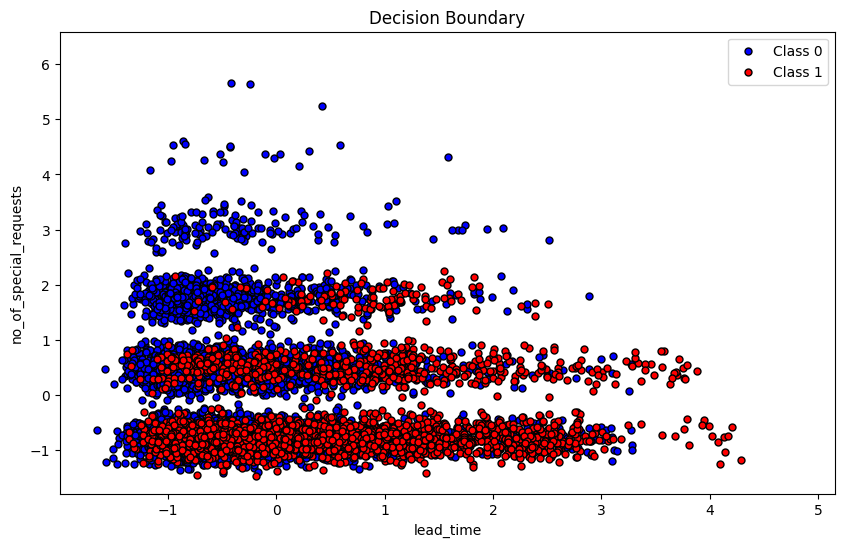

In [63]:
top_features = ["lead_time", "no_of_special_requests"]
X_train_top = X_train_processed[top_features]
X_test_top = X_test_processed[top_features]
ad_top = adaBoost.adaBoostTraining(X_train_top,y_train_processed)
modelDescription.modelBenchmark(ad_top,X_test_top,y_test_processed)
modelDescription.DecisionBoundryWithJitter(ad_top,X_test_top,y_test_processed,jitter_amount=0.2)